In [3]:
import numpy as np
import matplotlib.pyplot as plt
from paths import training_set, test_set
from helpers import standardize, load_csv_data, load_csv_title

Load the training set as well as the feature names

In [8]:
y,x,ids = load_csv_data(training_set)
title = load_csv_title(training_set)
print('Data set is of the following shape :' + str(x.shape))
print('The features are : ')
print(title)

Data set is of the following shape :(250000, 30)
Features are : 
['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']


Determine the correlation heatmap of our data before all preprocessing

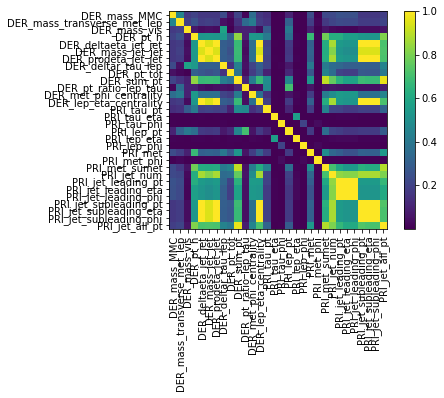

In [10]:
corr = np.abs(np.corrcoef(x,rowvar = False))
plt.imshow(corr)
plt.colorbar()
plt.xticks(ticks=np.arange(len(title)),labels=title,rotation=90)
plt.yticks(ticks=np.arange(len(title)),labels=title)
plt.show()